<a href="https://colab.research.google.com/github/tnkyk/deep-learning/blob/001_dog_or_cat/001_dog_or_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras==2.2.5
!pip install tensorflow==1.14.0
!pip install h5py==2.10.0

     |████████████████████████████████| 336 kB 27.3 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.5 which is incompatible.
     |████████████████████████████████| 109.3 MB 39 kB/s 
     |████████████████████████████████| 488 kB 68.4 MB/s 
     |████████████████████████████████| 3.1 MB 43.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# ネットから画像を集めるためのライブラリ
!pip install icrawler

In [3]:
# from icrawler.builtin import GoogleImageCrawler
# 猫の画像を100枚取得
# crawler = GoogleImageCrawler(storage={"root_dir": "cats"})
# crawler.crawl(keyword="猫", max_num=100)
from icrawler.builtin import BingImageCrawler

# 猫の画像を100枚取得
crawler = BingImageCrawler(storage={"root_dir": "cat"})
crawler.crawl(keyword="猫", max_num=100)

2022-01-22 12:47:54,438 - INFO - icrawler.crawler - start crawling...
2022-01-22 12:47:54,441 - INFO - icrawler.crawler - starting 1 feeder threads...
2022-01-22 12:47:54,448 - INFO - feeder - thread feeder-001 exit
2022-01-22 12:47:54,448 - INFO - icrawler.crawler - starting 1 parser threads...
2022-01-22 12:47:54,459 - INFO - icrawler.crawler - starting 1 downloader threads...
2022-01-22 12:47:54,763 - INFO - parser - parsing result page https://www.bing.com/images/async?q=猫&first=0
2022-01-22 12:47:54,993 - INFO - downloader - image #1	https://pic2.zhimg.com/v2-c772f409a8c2c5603df84c841274d83d_r.jpg
2022-01-22 12:47:58,470 - INFO - downloader - image #2	https://img.zcool.cn/community/0160875c7cda32a801203d226e0076.jpg
2022-01-22 12:47:59,671 - INFO - downloader - image #3	https://img.zcool.cn/community/01eafb5d2b3736a8012148379339e3.jpg
2022-01-22 12:48:01,183 - INFO - downloader - image #4	http://wx1.sinaimg.cn/large/683769f0gy1fnrqvp1oouj21400u0diz.jpg
2022-01-22 12:48:02,358 - IN

In [4]:
# 犬の画像を100枚取得
# crawler = GoogleImageCrawler(storage={"root_dir": "dogs"})
# crawler.crawl(keyword="犬", max_num=100)
from icrawler.builtin import BingImageCrawler

# 猫の画像を100枚取得
crawler = BingImageCrawler(storage={"root_dir": "dog"})
crawler.crawl(keyword="犬", max_num=100)

2022-01-22 12:50:16,499 - INFO - icrawler.crawler - start crawling...
2022-01-22 12:50:16,503 - INFO - icrawler.crawler - starting 1 feeder threads...
2022-01-22 12:50:16,508 - INFO - feeder - thread feeder-001 exit
2022-01-22 12:50:16,508 - INFO - icrawler.crawler - starting 1 parser threads...
2022-01-22 12:50:16,517 - INFO - icrawler.crawler - starting 1 downloader threads...
2022-01-22 12:50:16,827 - INFO - parser - parsing result page https://www.bing.com/images/async?q=犬&first=0
2022-01-22 12:50:16,972 - INFO - downloader - image #1	https://1.bp.blogspot.com/-LmmkeFy607Y/WrD1GfzHAKI/AAAAAAAAF_c/hDdmR33XaGg01i9R6HocUMlAcSljwv5dQCLcBGAs/s1600/Rigeru1.jpg
2022-01-22 12:50:17,014 - INFO - downloader - image #2	https://2.bp.blogspot.com/-FAb4rabzv1s/WrD1GarjqBI/AAAAAAAAF_g/CLZjmAez4aE3nlvWiFO8pLJPqsaPPhYuACLcBGAs/s1600/Rigeru2.jpg
2022-01-22 12:50:17,178 - INFO - downloader - image #3	https://stat.ameba.jp/user_images/20200920/22/smile-112/5a/52/j/o1024102314822510144.jpg
2022-01-22 1

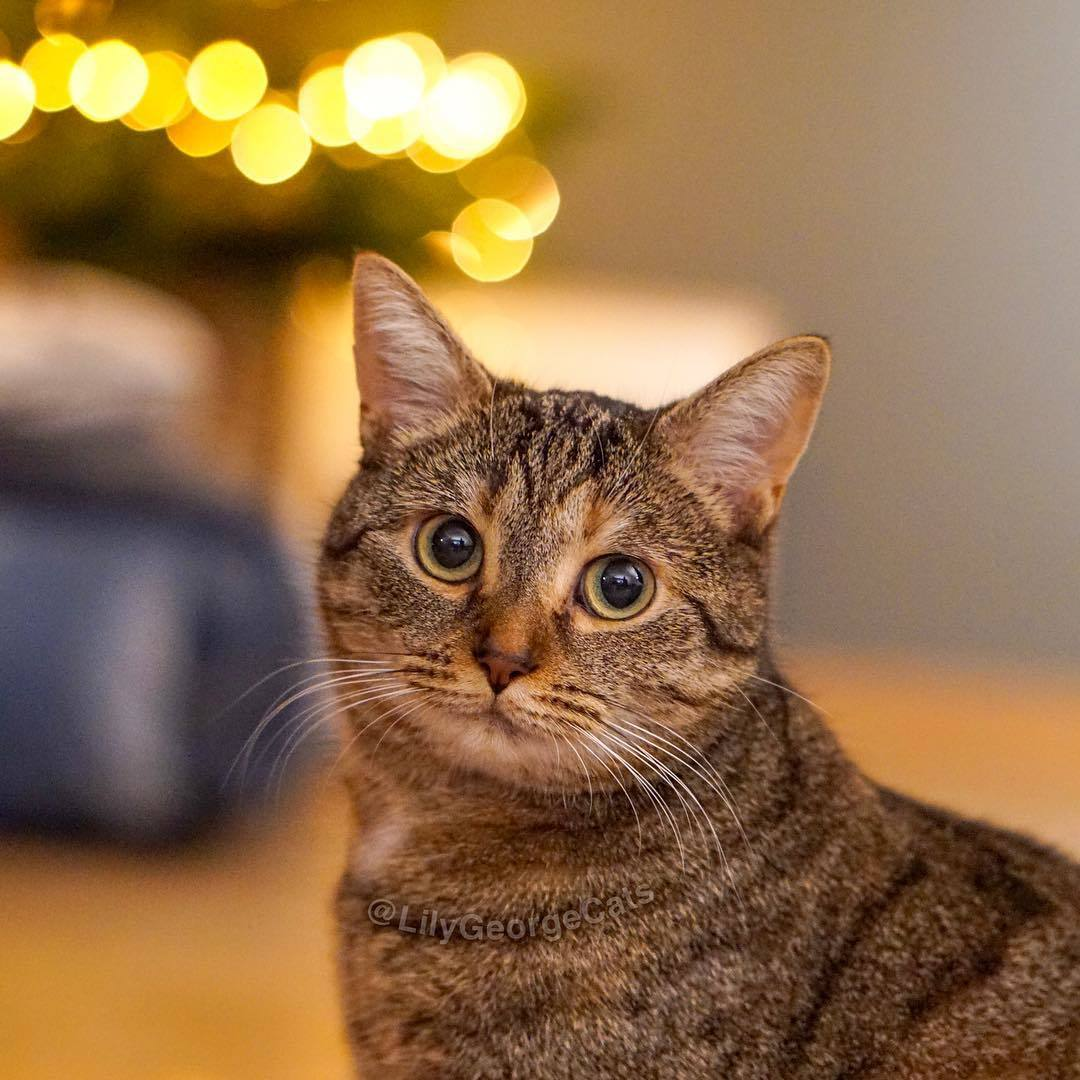

In [5]:
# 猫の画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cat/000001.jpg"))

In [6]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile
# IOError: image file is truncated (0 bytes not processed)回避のため
ImageFile.LOAD_TRUNCATED_IMAGES = True

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
y_train = []
y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:

            # angleに代入される値
            # -20
            # -15
            # -10
            #  -5
            # 0
            # 5
            # 10
            # 15
            # 画像を5度ずつ回転
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                y_train.append(index)
                # FLIP_LEFT_RIGHT　は 左右反転
                img_trains = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trains)
                X_train.append(data)
                y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./dog_cat.npy", xy)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop # TensorFlow1系
# from keras.optimizers import RMSprop # エラー（ImportError: cannot import name 'RMSprop' from 'keras.optimizers' (/usr/local/lib/python3.7/dist-packages/keras/optimizers.py)）が発生
# from tensorflow.keras.optimizers import RMSprop # TensorFlow2系

from keras.utils import np_utils
import keras
import numpy as np

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    # to_categorical()にてラベルをone hot vector化
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()

    # Xは(1200, 64, 64, 3)
    # X.shape[1:]とすることで、(64, 64, 3)となり、入力にすることが可能です。
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # https://keras.io/ja/optimizers/
    # 今回は、最適化アルゴリズムにRMSpropを利用
    opt = RMSprop(lr=0.00005, decay=1e-6)
    # https://keras.io/ja/models/sequential/
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    # HDF5ファイルにKerasのモデルを保存
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/40
54/54 [==============================] - 12s 34ms/step - loss: 0.6723 - accuracy: 0.5964
Epoch 2/40
54/54 [==============================] - 2s 29ms/step - loss: 0.6177 - accuracy: 0.6676
Epoch 3/40
54/54 [==============================] - 2s 29ms/step - loss: 0.5783 - accuracy: 0.7015
Epoch 4/40
54/54 [==============================] - 2s 29ms/step - loss: 0.5203 - accuracy: 0.7480
Epoch 5/40
54/54 [==============================] - 2s 29ms/step - loss: 0.4863 - accuracy: 0.7613
Epoch 6/40
54/54 [==============================] - 2s 29ms/step - loss: 0.4645 - accuracy: 0.7839
Epoch 7/40
54/54 [==============================] - 2s 28ms/step - loss: 0.4213 - accuracy: 0.8092
Epoch 8/40
54/54 [==============================] - 2s 29ms/step - loss: 0.3883 - accuracy: 0.8438
Epoch 9/40
54/54 [==============================] - 2s 29ms/step - loss: 0.3527 - accuracy: 0.8491
Epoch 10/40
54/54 [==============================] - 2s 29ms/step - loss: 0.3315 - accuracy: 0.8537
Epoch 11

In [8]:
!wget -O "dog1.jpg" https://aiacademy.jp/assets/images_test/164_16bd5895d6f.jpeg 

--2022-01-22 13:02:15--  https://aiacademy.jp/assets/images_test/164_16bd5895d6f.jpeg
Resolving aiacademy.jp (aiacademy.jp)... 54.150.165.60
Connecting to aiacademy.jp (aiacademy.jp)|54.150.165.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28306 (28K) [image/jpeg]
Saving to: ‘dog1.jpg’

dog1.jpg            100%[===================>]  27.64K  --.-KB/s    in 0s      

2022-01-22 13:02:16 (221 MB/s) - ‘dog1.jpg’ saved [28306/28306]



In [9]:
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (64, 64)

"""
dog1.jpgというファイル名の画像をGoogle Colab上にアップロードする方法は2通りあります。
1つが、下記のコードを実行し画像をアップロードする方法
from google.colab import files
uploaded = files.upload()
2つが、Colab左メニューの>アイコンを押して、目次、コード スニペット、ファイル
の3つ表示されるますが、右のファイルタブから画像をアップロードする方法です。
このファイルタブをクリックするとアップロードと更新の2つがありますが、
アップロードを押すと画像をアップロードすることが可能です。
"""

testpic     = "./dog1.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

model = load_model(keras_param)
img = load_image(testpic)
prd = model.predict(np.array([img]))
print(prd) # 精度の表示
prelabel = np.argmax(prd, axis=1)
if prelabel == 0:
    print(">>> 犬")
elif prelabel == 1:
    print(">>> 猫")

[[9.999949e-01 5.185399e-06]]
>>> 犬
